# Assignment 4: Food, Halloween, and Analytics

In this assignment you will practice crawling to fetch data from a website (allrecipes.com).

You will then put your data into a Pandas dataframe and perform some analysis of the fetched recipes.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
!sudo pip3 install -U statsmodels

In [1]:
from lxml import html
from xml.etree import ElementTree
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import statsmodels.formula.api as smf
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Task 1: Crawl AllRecipes.com

We are getting ready for Halloween, and we want to cook some good food. No, good is not good enough. We want to first the BEST recipe for Heloween.

But to find the best recipe, we need data. 

After a 1-min Google search, we find the page `https://www.allrecipes.com/recipes/189/holidays-and-events/halloween/` that contains recipes for Halloween. From a quick look on the webpage, we see that, for each recipe we have a **star rating**, and we also have the **number of reviews** for the recipe.

So, you need to write a crawler that will parse AllRecipes and fetch data for the recipes. For this assignment, we will only fetch the data from the recipes from the results page; we will not fetch the recipes themselves.  We need to fetch the title of the recipe, the URL for the recipe, the number of reviews, and the average star rating (out of 5 stars).

Tips:

* The URLs for the pages with the recipes have the form `https://www.allrecipes.com/recipes/189/holidays-and-events/halloween/?page=...` with the page parameter taking values from 1 and above.
* Each recipe entry is stored under HTML nodes marked as `<article @class="fixed-recipe-card">`. You need to parse these nodes to get the information for each recipe.
* To get the number of reviews, you may need to take a look at the HTML source using the "View Source" capability. The "developer view" hides the fact that the number is not text but part of an HTML tag (e.g., the number 2004 will be listed as `<format-large-number number="2004"></format-large-number>`)

In [40]:
# Template code to get you started. This code gets as input an HTML page and extracts the list
# of recipes that are listed there.

def get_recipes_from_page(url):
    
    doc = html.fromstring(requests.get(url).text)
    recipes = doc.xpath('//article[@class="fixed-recipe-card"]')
    
    result = []
    for r in recipes:
        #DEBUGING CODE. Use it to print out the HTML of the "recipe card"
        #html_str = ElementTree.tostring(r).decode()
        #print(html_str)
        # print("=============================\n=============================\n=============================")
        # continue
        
        ### WRITE YOUR CODE HERE. 
        # Your XPath queries should identify the corresponding parts of the page 
        # that contain the information that you need. 
        title = r.xpath('//span[@class="fixed-recipe-card__title-link"]/text()')[0]
        recipe_url = r.xpath('//a[@class="fixed-recipe-card__title-link"]')[0].get('href')
        rating = r.xpath('//span[@class="stars stars-4-5"]/@data-ratingstars')[0]
        reviews = r.xpath('//format-large-number/@number')[0] 
        # If you feel adventurous: write a crawler that connects to the 
        # main page of the recipe, and fetched the calories
        # calories = get_calories(recipe_url)
        
        entry = {
            'title' : title,
            'recipe_url' : recipe_url,
            'rating' : round(float(rating),2),
            'reviews' : int(reviews),
            # 'calories' : get_calories(url)
        }
        result.append(entry)
        
    print (result)

In [41]:
test_url = 'https://www.allrecipes.com/recipes/189/holidays-and-events/halloween/?page=1'
get_recipes_from_page(test_url)

[{'rating': 4.67,
  'recipe_url': 'https://www.allrecipes.com/recipe/240049/crispy-rice-candy-corn-treats/',
  'reviews': 2015,
  'title': 'Crispy Rice Candy Corn Treats'},
 {'rating': 4.67,
  'recipe_url': 'https://www.allrecipes.com/recipe/240049/crispy-rice-candy-corn-treats/',
  'reviews': 2015,
  'title': 'Crispy Rice Candy Corn Treats'},
 {'rating': 4.67,
  'recipe_url': 'https://www.allrecipes.com/recipe/240049/crispy-rice-candy-corn-treats/',
  'reviews': 2015,
  'title': 'Crispy Rice Candy Corn Treats'},
 {'rating': 4.67,
  'recipe_url': 'https://www.allrecipes.com/recipe/240049/crispy-rice-candy-corn-treats/',
  'reviews': 2015,
  'title': 'Crispy Rice Candy Corn Treats'},
 {'rating': 4.67,
  'recipe_url': 'https://www.allrecipes.com/recipe/240049/crispy-rice-candy-corn-treats/',
  'reviews': 2015,
  'title': 'Crispy Rice Candy Corn Treats'},
 {'rating': 4.67,
  'recipe_url': 'https://www.allrecipes.com/recipe/240049/crispy-rice-candy-corn-treats/',
  'reviews': 2015,
  'titl

In [25]:
# This code will go through the first 50 pages of the results, extracting recipes
# Once a page returns back 0 recipes, we stop

# We store our results in this list
allrecipes = []
for page in range(1,50):
    url = 'https://www.allrecipes.com/recipes/189/holidays-and-events/halloween/?page=' + str(page)
    # We get back a list of dictionaries for each page; each dictionary corresponds to a recipe
    recipes = get_recipes_from_page(url)
    print(f"Found {len(recipes)} recipes in page {page}")
    if len(recipes) == 0:
        break
    allrecipes.extend(recipes)
    
print(f"We extracted a total of {len(allrecipes)} recipes")

Found 29 recipes in page 1
Found 20 recipes in page 2
Found 20 recipes in page 3
Found 20 recipes in page 4
Found 20 recipes in page 5
Found 20 recipes in page 6
Found 20 recipes in page 7
Found 20 recipes in page 8
Found 20 recipes in page 9
Found 20 recipes in page 10
Found 20 recipes in page 11
Found 20 recipes in page 12
Found 20 recipes in page 13
Found 20 recipes in page 14
Found 20 recipes in page 15
Found 20 recipes in page 16
Found 20 recipes in page 17
Found 20 recipes in page 18
Found 20 recipes in page 19
Found 20 recipes in page 20
Found 20 recipes in page 21
Found 20 recipes in page 22
Found 20 recipes in page 23
Found 20 recipes in page 24
Found 20 recipes in page 25
Found 20 recipes in page 26


IndexError: list index out of range

In [26]:
# Create a dataframe with the recipes
df = pd.DataFrame(allrecipes)
df

,rating,recipe_url,reviews,title
0,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
1,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
2,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
3,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
4,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
5,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
6,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
7,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
8,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
9,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats


## Task 2: Descriptive Statistics on Recipes

We now start analyzing the recipes. 

a. Use the `describe()` and `hist()` commands to analyze the contents of the `reviews` and `rating` columns.

b. Find the recipe with the highest number of reviews

c. Based on the results of the first exploratory analysis, you decide to keep only recipes more than 10 reviews, and with rating above 4.5. Create a new dataframe with only these well-reviewed, and highly-rated recipes.

d. Among the recipes with more than 10 reviews, find the one with the highest rating. The command `df.rating.max()` returns back the highest value for the column `rating` of the dataframe `df`.

e. Find all the recipes with more than 10 reviews, and with rating above 4.5, that contain the word 'Cookie' in the title. The command `df.title.str.contains('Cookie')` can be used for this purpose.

f. Using the dataframe from step (c), create a scatterplot that shows the number of reviews on the x-axis and the recipe rating on the y axis.

g. Use `statsmodels` and run an OLS regression examining if there is a correlation between the number of reviews and the recipe rating. The code below takes as input a dataframe `df` and runs a regression of column `Y` against columns `X1` and `X2`.

```python
results = smf.ols('Y ~ X1 + X2', data=df).fit()
print(results.summary())
```

Examine the returned coefficients and explain if there is a statistically significant effect. 


h. (**Very Hard**; optional) Find the Pareto-optimal set of recipes. A recipe belongs to the Pareto-optimal set if there is no other recipe that dominates it. We say that a recipe A dominates recipe B if `(A.rating >= B.rating and A.reviews >= B.reviews)`. Do the same for recipes that contain the word `Cookie`.

In [27]:
#a. use the describe() and hist() commands to analyze the contents of the reviews and rating columns
desc = df.describe()
desc

,rating,reviews
count,529.000000,529.000000
mean,4.529735,169.896030
std,0.141571,458.417732
min,4.250000,1.000000
25%,4.450000,6.000000
50%,4.580000,24.000000
75%,4.630000,82.000000
max,4.720000,2015.000000


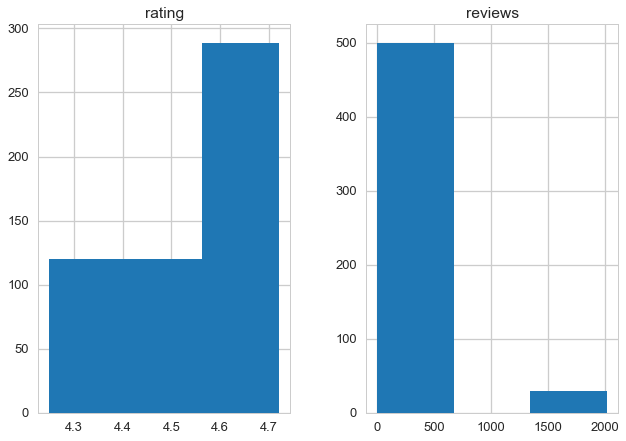

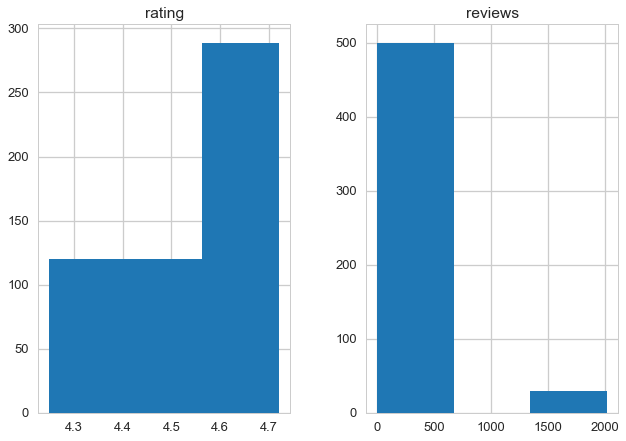

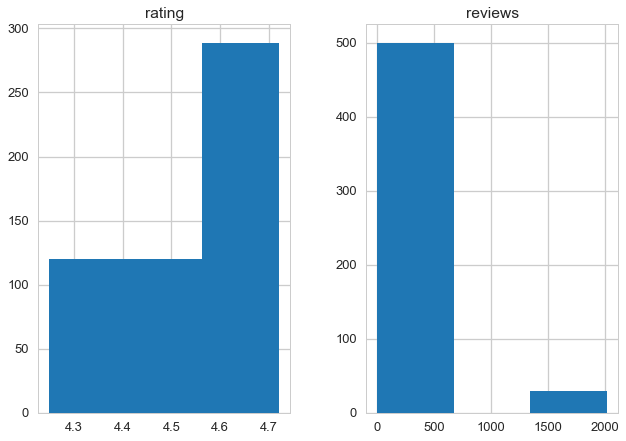

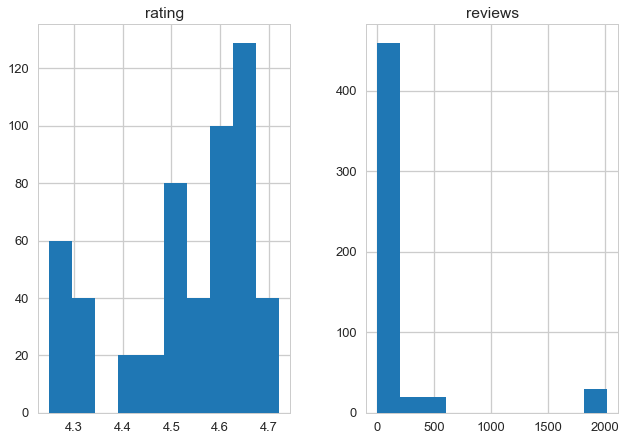

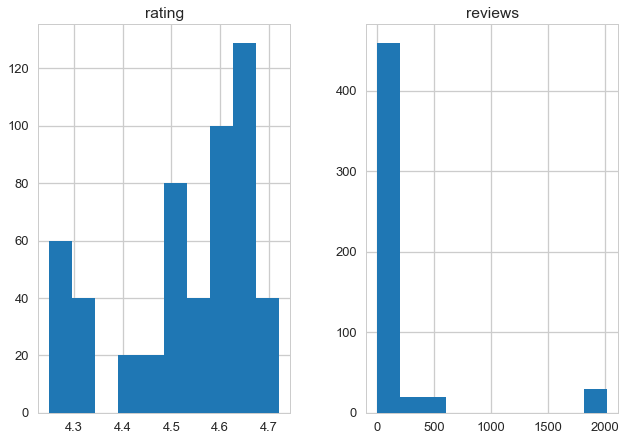

In [33]:
#a. use the describe() and hist() commands to analyze the contents of the reviews and rating columns
hist = df.hist()
plt.show()

In [36]:
#b. Find the recipe with the highest number of reviews
df[df['reviews'] == df['reviews'].max()]

,rating,recipe_url,reviews,title
0,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
1,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
2,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
3,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
4,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
5,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
6,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
7,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
8,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
9,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats


In [43]:
#c. Based on the results of the first exploratory analysis, you decide to keep only receipes more than 10 reviews, and with rating above 4.5. 
#Create a new dataframe with only these well-reviewed, and highly-rate recipes
df.loc[(df.reviews > 10) & (df.rating > 4.5)]
df

,rating,recipe_url,reviews,title
0,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
1,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
2,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
3,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
4,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
5,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
6,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
7,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
8,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats
9,4.67,https://www.allrecipes.com/recipe/240049/crisp...,2015,Crispy Rice Candy Corn Treats


In [52]:
#d. among the recipes with more than 10 reviews, find the one with the highest rating

#recipes with more than 10 reviews
dff = df[df['reviews'] > 10]
#find the one with the highest rating
df[df['rating'] == dff.rating.max()]

,rating,recipe_url,reviews,title
29,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
30,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
31,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
32,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
33,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
34,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
35,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
36,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
37,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I
38,4.72,https://www.allrecipes.com/recipe/7255/dirt-ca...,537,Dirt Cake I


In [78]:
#e. Find all the recipes with more than 10 reviews and with rating above 4.5, that contain the word 'Cookie' in the title
df.loc[(df['title'].str.contains('Cookie')) & (df['rating'] > 4.5) & (df['reviews'] > 10)]


,rating,recipe_url,reviews,title
149,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
150,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
151,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
152,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
153,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
154,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
155,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
156,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
157,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII
158,4.59,https://www.allrecipes.com/recipe/19239/pumpki...,59,Pumpkin Cookies VII


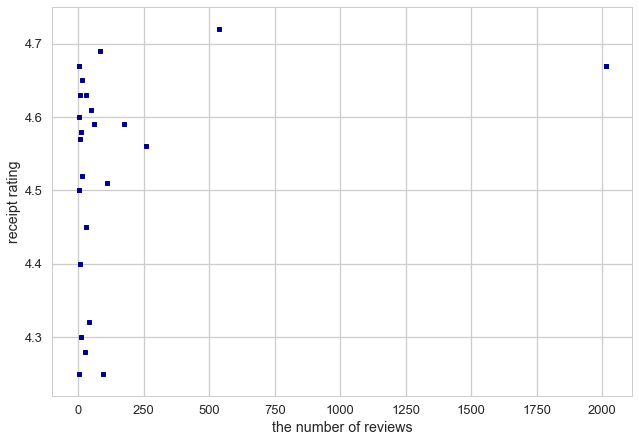

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
#f. Using the dataframe from step (c), create a scatterplot that shows the number of reviews on the
#x-axis and the receipt rating on y axis

#data from c
df.loc[(df.reviews > 10) & (df.rating > 4.5)]

df.plot.scatter(x='reviews', y='rating',c='DarkBlue')
plt.xlabel('the number of reviews')
plt.ylabel('receipt rating')
plt.show()


In [86]:
#g. Use statsmodels and run an oLS regression examining if there is a correlation between
#the number of reviews and the receipe rating

#data from c
df.loc[(df.reviews > 10) & (df.rating > 4.5)]

#df.plot.scatter(x='reviews', y='rating',c='DarkBlue')
results = smf.ols('rating ~ reviews',data=df).fit()
print(results.summary())

#R-squared is 0.088 so it is hard to tell that rating and the number of reviews are related

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     51.02
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           3.05e-12
Time:                        18:55:12   Log-Likelihood:                 308.49
No. Observations:                 529   AIC:                            -613.0
Df Residuals:                     527   BIC:                            -604.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5141      0.006    719.426      0.0